In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Numerično odvajanje

### Vprašanje 1

In [6]:
# točke = pot v času -> določi hitrost in pospešek

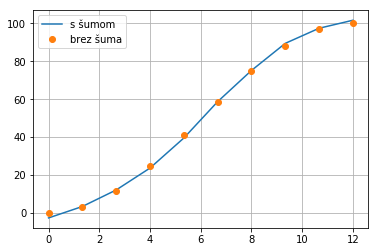

In [16]:
N = 10 #če povečamo na 100 dobimo slabši rezultat ker napaka ostane enaka - 2 vrsti napak (glej predlogo)
t = np.linspace(0, 12, N) #čas slabega šprinterja
s_ = 50*(np.cos(2*np.pi*(t-12)/24) +1)
s = s_ + np.random.randn(len(t)) #dejansko = šum, ne moremo natančno zmerit
plt.plot(t, s, '-', label='s šumom')
plt.plot(t, s_, 'o', label='brez šuma')
plt.grid()
plt.legend()

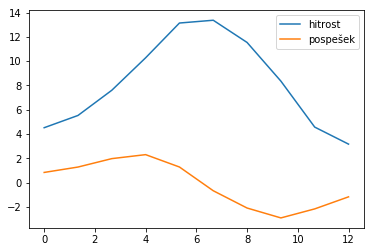

In [20]:
hitrost = np.gradient(s, t) # vrednosti t
pospešek = np.gradient(hitrost, 12/N) #ali 12/N=korak
plt.plot(t, hitrost, label='hitrost')
plt.plot(t, pospešek, label='pospešek')
plt.legend();

### Vprašanje 3

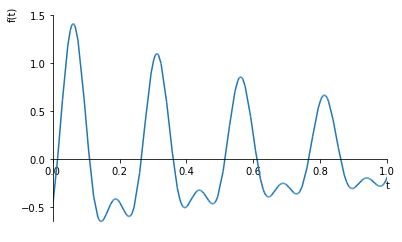

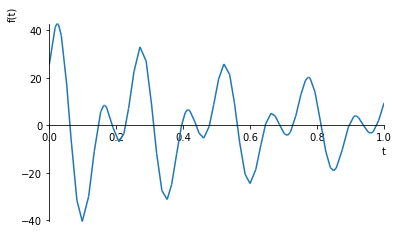

In [21]:
t = sym.symbols('t') #iz patebin
w = 8*sym.pi
x_sym = sym.exp(-t) * (sym.sin(w*t) - 0.5*sym.cos(2*w*t))
dx_sym = sym.diff(x_sym, t)
x_num = sym.lambdify(t, x_sym, 'numpy') #vrednost funkcije - lambdify pretvori v numpy funkcijo -> simbolen odvod izračunan kot številke!
dx_num = sym.lambdify(t, dx_sym, 'numpy') #simbolna vrednost odvoda (točna) - bomo gledali napake
sym.plot(x_sym, (t, 0, 1))
sym.plot(dx_sym, (t, 0, 1))

In [25]:
t_ = np.linspace(0, 1, 100+1) #100 segmentov = 100+1 točk!!
x_t = x_num(t_)
dx_t = dx_num(t_)

In [27]:
dx_tnum = np. gradient(x_t, t_)

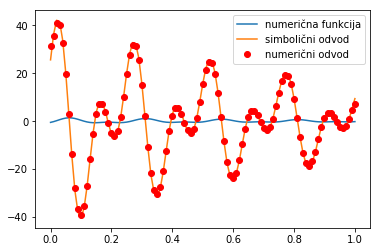

In [36]:
plt.plot(t_, x_t, label='numerična funkcija')
plt.plot(t_, dx_t, label='simbolični odvod')
plt.plot(t_, dx_tnum, 'ro', label='numerični odvod') #se prekrivata - na začetku največja napaka -> metoda naprej
plt.legend();

### Vprašanje 4 (wan)

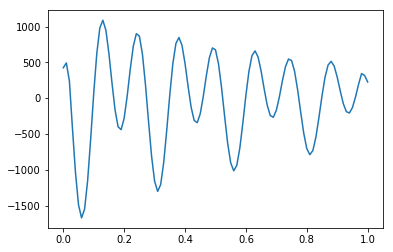

In [43]:
h = t_[1] - t_[0]
ddx_num = np.gradient(dx_tnum, h) #če ne podamo h vrednosti 100x manjše- s tem hjem samo deli!
plt.plot(t_, ddx_num)

### Vprašanje 5 
* napake za 100 točk in za 200 točk - ta napaka se z večanjem h-ja manjša ker ni šuma!

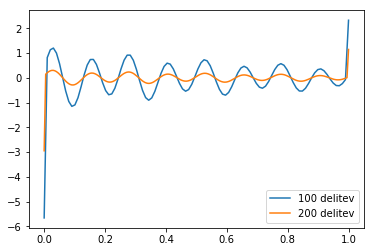

In [46]:
for i in [100, 200]:
    t_ = np.linspace(0, 1, i)
    x_t = x_num(t_)
    dx_sympy = dx_num(t_)
    dx_gradient = np.gradient(x_t, t_)
    napaka = dx_sympy - dx_gradient #prava - numerična vrednost
    plt.plot(t_, napaka, label=f'{i} delitev')
plt.legend();
#napaka na začetku in na koncu - posledica druge sheme naprej in nazaj

### Vprašanje 6

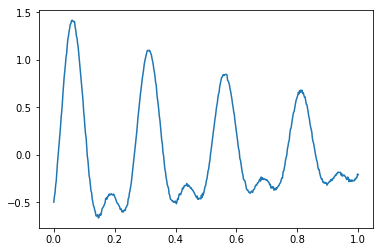

In [59]:
t_, h = np.linspace(0, 1, 500, retstep=True)
x_šum = x_num(t_) + 0.01 * np.random.randn(500) #v rand koliko naključnih točk želimo
plt.plot(t_, x_šum)

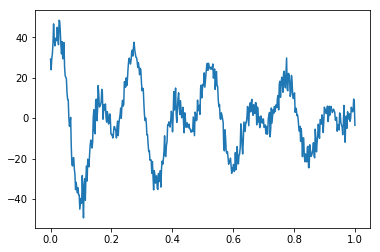

In [60]:
dx = np.gradient(x_šum, h)
ddx = np.gradient(dx, h)
plt.plot(t_, dx) #prvi odvod - precej več šuma!
#plt.plot(t_, dx_num(t_), 'r')

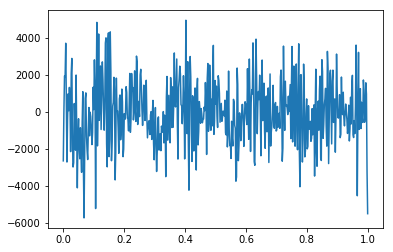

In [61]:
plt.plot(t_, ddx) #drugi odvod - samo šum! -> 2x delimo z h-jem še manjša vrednost s katero deli - še slabše

In [62]:
# z frekvenčnim filtrom bi lahko to stvar rešili -> velike frekvence
#poguglaj: scipy filtering

# Uteži centralne diferenčne sheme  v scipy
* bolj natančne diferenčne sheme - manj občutljive na šum

In [63]:
from scipy.misc import central_diff_weights as cdw

In [75]:
#cdw(št_točk, red_odvoda)
cdw(3, 1) #tudi če točke x_i ni v izračunu vseeno se upošteva-- okolica 3h točk

array([-0.5,  0. ,  0.5])

In [77]:
cdw(5, 2)

array([-0.08333333,  1.33333333, -2.5       ,  1.33333333, -0.08333333])

### Vprašanje 7 (wan)

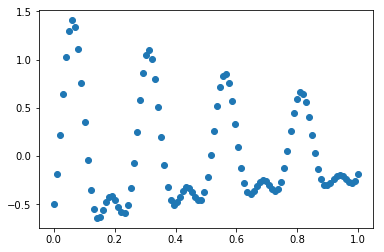

In [79]:
t = np.linspace(0, 1, 100)
x = x_num(t)
plt.plot(t, x, 'o')

In [81]:
h = t[1] - t[0]
utezi = cdw(3, 1)

odvodi = []
for i in range(1, len(x)-1): #po vseh točkah razen prvi in zadnji
    okolica = np.array([x[i-1], x[i], x[i+1]])
    odvodi.append(np.dot(okolica, utezi)/h) #isto ležeče točke pomnožimo

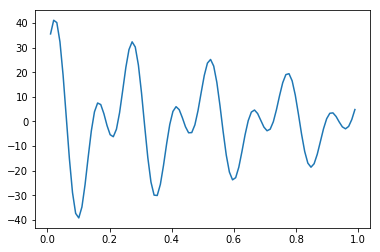

In [82]:
plt.plot(t[1:-1], odvodi)

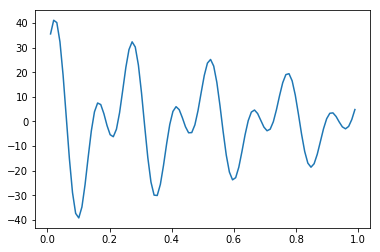

In [85]:
odvodi_2 = (x[2:] * 0.5 + x[:-2] * (-0.5)) / h #vektorizirano -> prva točka od 2 naprej, druga točka od 1 naprej - vedno za prvo!!
plt.plot(t[1:-1], odvodi_2)

In [86]:
%%timeit
h = t[1] - t[0]
utezi = cdw(3, 1)

odvodi = []
for i in range(1, len(x)-1):
    okolica = np.array([x[i-1], x[i], x[i+1]])
    odvodi.append(np.dot(okolica, utezi)/h)

369 µs ± 8.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [89]:
%%timeit
odvodi_2 = (x[2:] * 0.5 + x[:-2] * (-0.5)) / h #krajše, hitrejše

4.53 µs ± 24.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Vprašanje 8

In [91]:
naprej = np.array([-3/2, 2, -1/2]) #diff sheme drugi red napake
nazaj = np.array([1/2, -2, 3/2])

ValueError: x and y must have same first dimension, but have shapes (100,) and (9,)

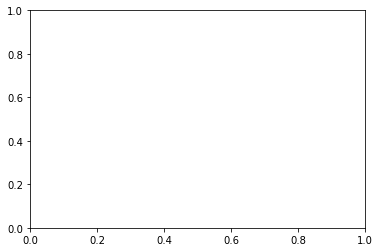

In [96]:
okolica1 = np.array([x[0], x[1], x[2]])
odvodi1 = np.dot(okolica1, naprej) / h
okolica2 = np.array([x[-3], x[-2], x[1]])
odvodi2 = np.dot(okolica2, nazaj) / h
vsi_odvodi = np.hstack((okolica1, okolica, okolica2))
plt.plot(t, vsi_odvodi)
plt.plot(t, dx_num(t), 'go')
plt.plot(t, np.gradient(x, h, edge_order=2), 'k') #edgeorder uporabi drugi red na robovih izračuna isto ku mi.. čene uporabi 1 red in je večja napaka

In [ ]:
#nevem zakaj ne dela